In [1]:
import pandas as pd
import numpy as np
import verde as vd
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns; sns.set()
sns.set_style('darkgrid', {'legend.frameon':True})
%matplotlib inline
#import rasterio
#import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch
#import rasterio.plot
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '{:0,d}'.format(int(x))
    return s

#fu = rasterio.open("ftunion2864.tif")
#la = rasterio.open("lance2864.tif")
tfuwells = gpd.read_file(r"D:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\('Kl', 'Tfu')_KNN_predictions.shp")
klawells = gpd.read_file(r"D:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\('Kfh', 'Kl')_KNN_predictions.shp")
lance = gpd.read_file(r'shapefiles/lance_outcrop.shp')
ftun = gpd.read_file(r'shapefiles/ftunion_outcrop.shp')
faults = gpd.read_file(r'shapefiles/simp_faults.shp')
sections = gpd.read_file(r'shapefiles/crossection.shp',)

In [2]:
tfuwells.head()

,API,Tfu,Tfob,Tfb,Tfc,Klr,Kl,Kll,Klz,Kfh,x,y,prediction,probabilit,FIELD_NAME,LON,LAT,ELEV_KB,TD,geometry
0,4900705010,0.0,0.0,0.0,0.0,2294.3,2294.3,2569.6,3085.4,3917.7,-107.62776,41.01171,0,1.000000,WC,-107.62776,41.01171,6627,4125,POINT (-107.62776 41.01171)
1,4900705018,973.9,1226.3,1295.5,1569.4,2310.3,2310.3,2696.6,3289.7,3800.6,-107.74046,41.02101,0,1.000000,BAGGS SOUTH,-107.74046,41.02101,6591,16248,POINT (-107.74046 41.02101)
2,4900705023,1891.7,2257.6,2368.2,2506.6,3307.5,3307.5,3945.5,0.0,4860.1,-107.83873,41.03026,1,0.508602,BAGGS SOUTH,-107.83873,41.03026,6344,5506,POINT (-107.83873 41.03026)
3,4900705050,2287.6,2681.5,2732.2,2923.5,3652.1,3652.1,4125.9,4494.2,5340.9,-107.68510,41.13570,0,1.000000,ROBBERS GULCH,-107.68510,41.13570,6651,8385,POINT (-107.6851 41.1357)
4,4900705051,741.0,1275.6,1326.3,1478.2,2243.6,2243.6,2738.6,3340.8,4246.8,-107.65156,41.16104,0,1.000000,ROBBERS GULCH,-107.65156,41.16104,6426,7195,POINT (-107.65156 41.16104)


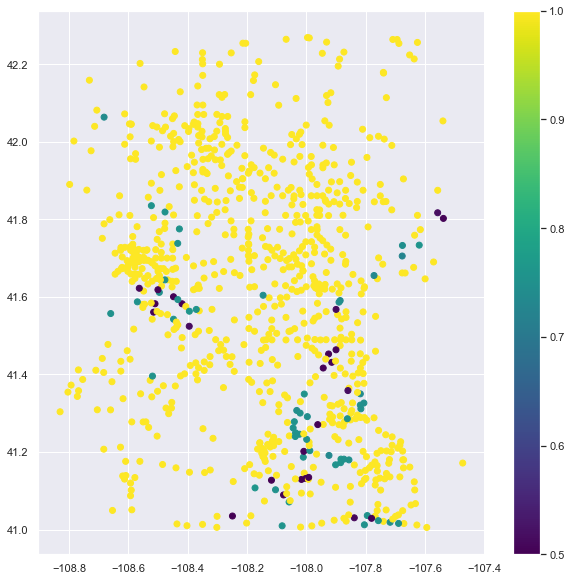

In [3]:
plt.figure(figsize=(10,10))
plt.scatter(tfuwells.LON, tfuwells.LAT, c=tfuwells.probabilit, cmap='viridis', vmin=0.5, vmax=1)
plt.colorbar()

In [5]:
tfuwells.probabilit
newscore = 50 * (tfuwells.probabilit)
tfuwells['newprob'] = newscore
klawells['newprob'] = newscore
futruncation = tfuwells[tfuwells['prediction']== 0]
fuonlap = tfuwells[tfuwells['prediction']== 1]
fuhorizontal = tfuwells[tfuwells['prediction']== 2]
latruncation = klawells[klawells['prediction']== 0]
laonlap = klawells[klawells['prediction']== 1]
lahorizontal = klawells[klawells['prediction']== 2]

Text(55.0, 0.5, 'Northing (m)')

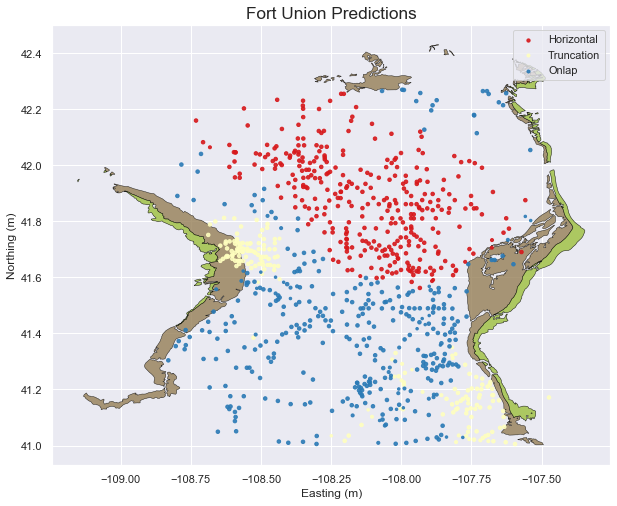

In [8]:
#y_format = tkr.FuncFormatter(func)
fig, ax = plt.subplots(figsize=(10, 10))
#ax.yaxis.set_major_formatter(y_format)
#ax.xaxis.set_major_formatter(y_format)
#rasterio.plot.show(fu, ax=ax, cmap='gray', zorder=1)
#rasterio.plot.show(fu, ax=ax, contour=True, contour_label_kws={'fmt':'%1.0f', 'colors':'black'}, zorder=2)
fuhorizontal.plot(ax=ax, markersize=fuhorizontal['newprob']/4, color='#d7191c', label='Horizontal', legend=True, alpha=0.9, zorder=6)
futruncation.plot(ax=ax, markersize=futruncation['newprob']/4, color='#ffffbf', label='Truncation', legend=True, alpha=0.9, zorder=4)
fuonlap.plot(ax=ax, markersize=fuonlap['newprob']/4, color='#2c7bb6', label='Onlap', legend=True, alpha=0.9, zorder=5)
kwarg2s = {'facecolor': '#957F56', 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': ''}
ftun.plot(ax=ax, zorder=3, label='Fort Union Outcrop', alpha=0.8, **kwarg2s)
kwarg3s = {'facecolor': '#A6C551', 'edgecolor': 'black', 'linewidth': 0.5, 'hatch': ''}
lance.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)
plt.legend()
plt.title('Fort Union Predictions', size='xx-large')
#plt.xlim(590000, 717000)
#plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
#plt.savefig('fortunion.pdf', bbox_inches='tight')

Text(55.0, 0.5, 'Northing (m)')

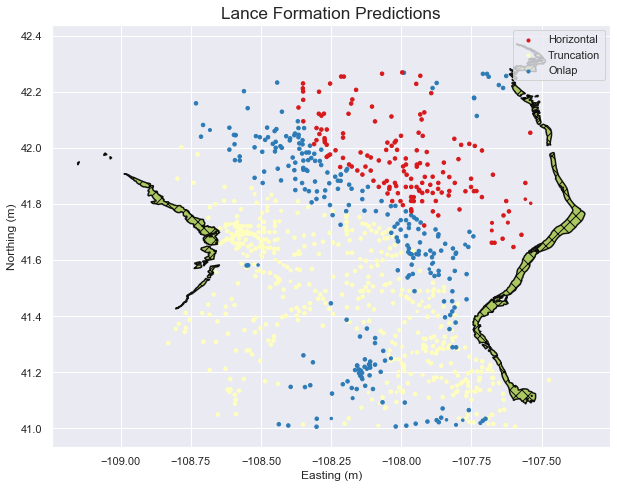

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

lahorizontal.plot(ax=ax, markersize=lahorizontal['newprob']/4, color='#d7191c', label='Horizontal', legend=True, zorder=6)
latruncation.plot(ax=ax, markersize=latruncation['newprob']/4, color='#ffffbf', label='Truncation', legend=True, zorder=4)
laonlap.plot(ax=ax, markersize=laonlap['newprob']/4, color='#2c7bb6', label='Onlap', legend=True, zorder=5)
kwarg3s = {'facecolor': '#A6C551', 'edgecolor': 'black', 'linewidth': 1.5, 'hatch': 'xx'}
lance.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9)
plt.legend()
plt.title('Lance Formation Predictions', size='xx-large')
#plt.xlim(590000, 717000)
#plt.ylim(55000, 200000)
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
#plt.savefig('lance.pdf', bbox_inches='tight')